# Q1 ##

$$Minimize\ x+2y$$

<div style="text-align: center"> Subject to constrint: </div>
$$5x + 10y \le 20 $$
$$4x + 2y \le 12 $$
$$3x + 10y \le 18$$
$$4x + 6y \le 14$$
$$x\ge 0,y\ge 0$$

In [31]:
using JuMP
using GLPK
using Xpress
using Plots

In [32]:
model = Model(Xpress.Optimizer)  

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [33]:
@variable(model, x >=0)
@variable(model, y >=0)

y

In [34]:
@constraint(model, 5x + 10y <= 20)
@constraint(model, 4x + 2y <= 12)
@constraint(model, 3x + 10y <= 18)
@constraint(model, 4x + 6y <= 14)

4 x + 6 y ≤ 14.0

In [35]:
@objective(model, Max, x + 2y)
optimize!(model)

In [36]:
println("x value: ",value(x))
println("y value: ",value(y))
println("objective value: ",objective_value(model))

x value: 2.0
y value: 1.0
objective value: 4.0


In [37]:
x1 = [0,4]; y1 = [2,0]
x2 = [0,3]; y2 = [6,0]
x3 = [0,6]; y3 = [1.8,0]
x4 = [0,3.5]; y4 = [2.33,0]

2-element Vector{Float64}:
 2.33
 0.0

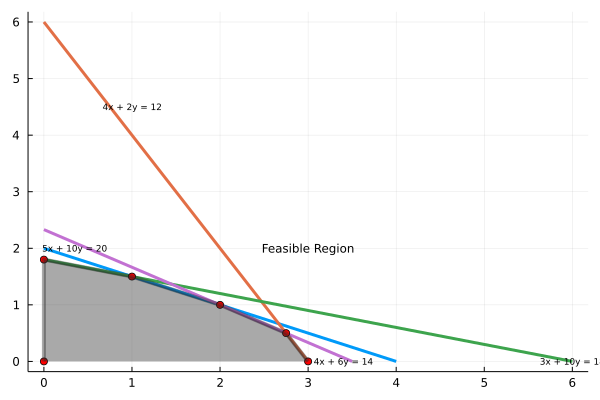

In [38]:
p1=plot(x1, y1,lw=3, annotation=[(0.35,2,"5x + 10y = 20",6)])
p2=plot!(p1, x2, y2,lw=3,annotation=[(1,4.5,"4x + 2y = 12",6)])
p3=plot!(p2, x3, y3,lw=3, annotation=[(6,0,"3x + 10y = 18",6)])
p4=plot!(p3, x4, y4,lw=3,annotation=[(3.4,0,"4x + 6y = 14",6)])


p5=plot!(p4, [0,0,1,2,2.75,3], [0,1.8,1.5,1,0.5,0], seriestype = :scatter,legend = false,color="red")

x=[0,0,1,2,2.75,3]; y=[0,1.8,1.5,1,0.5,0]
plot!(p5,x,y,palette = cgrad(:grays),lw=4, fill = 0, α = 0.4,annotation=[(3,2,"Feasible Region",8)])

$$Minimize\ x_1+x_2$$

<div style="text-align: center"> Subject to constrint: </div>
$$x_1 + 2x_2 \ge 2 $$
$$2x_1 + x_2 \ge 2 $$
$$x_1 + x_2 \le 1$$
$$x_1\ge 0,x_2\ge 0$$

In [39]:
using JuMP
using GLPK
using Xpress
using Plots

In [40]:
m = Model(Xpress.Optimizer)  

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [41]:
@variable(m, x1 >=0)
@variable(m, x2 >=0)

x2

In [42]:
@constraint(m, x1 + 2x2 >= 2)
@constraint(m, 2x1 + x2 >= 2)
@constraint(m, x1 + x2 <= 1)

x1 + x2 ≤ 1.0

In [43]:
@objective(m, Max, x1 + x2)
optimize!(m)

In [44]:
println("There are currently no solution in the model")

There are currently no solution in the model


In [45]:
x1 = [0,2]; y1 = [1,0]
x2 = [0,1]; y2 = [2,0]
x3 = [0,1]; y3 = [1,0]

2-element Vector{Int64}:
 1
 0

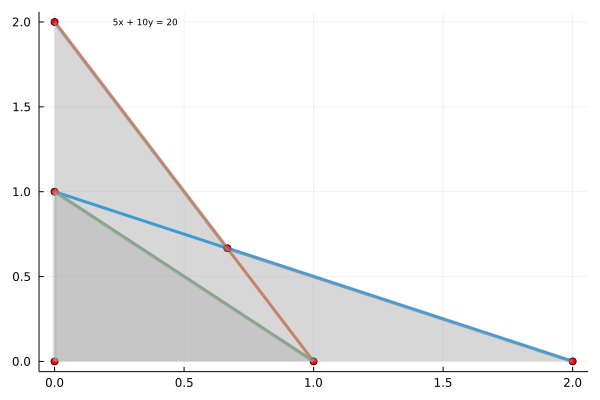

In [46]:
p1=plot(x1, y1,lw=3, annotation=[(0.35,2,"5x + 10y = 20",6)])
p2=plot!(p1, x2, y2,lw=3,annotation=[(1,4.5,"4x + 2y = 12",6)])
p3=plot!(p2, x3, y3,lw=3, annotation=[(6,0,"3x + 10y = 18",6)])

p4=plot!(p3, [0,0,1], [0,1,0], seriestype = :scatter,legend = false,color="red")
x=[0,0,1]; y=[0,1,0]
plot!(p4,x,y,palette = cgrad(:grays),lw=4, fill = 0, α = 0.4,annotation=[(3,2,"Feasible Region",8)])

p5=plot!(p3, [0,0.667,2], [2,0.6667,0], seriestype = :scatter,legend = false,color="red")
x=[0,0.667,2]; y=[2,0.6667,0]
plot!(p5,x,y,palette = cgrad(:grays),lw=4, fill = 0, α = 0.4,annotation=[(3,2,"Feasible Region",8)])

# Q2

Task description: <br>
T1: 100% Network, 10% I/O, 10% Computing<br>
T2: 10% Network, 100% I/O, 10% Computing<br>
T3: 10% Network, 10% I/O, 100% Computing<br>
<br>
Objective funtion:<br>
Max: T1+T2+T3<br>
<br>
Constrint: <br>
Network: T1+0.1T2+0.1T3<=100<br>
I/O: 0.1T1+T2+0.1T3<=100<br>
Computing: 0.1T1+0.1T2+T3<=100<br>
<br>
Variables: <br>
T1,T2,T3>=0<br>

In [47]:
using JuMP
using GLPK
using Xpress
using Plots

In [48]:
model = Model(Xpress.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [49]:
# Variables
# Task 1 needs to greater than 0
@variable(model, T1 >=0 )
# Task 2 needs to greater than 0
@variable(model, T2 >=0 )
# Task 3 needs to greater than 0
@variable(model, T3 >=0 )

T3

In [50]:
# Constraints
# Total network has to less than 100% T1:100% Network, T2: 10% Network, T3: 10% Network
@constraint(model, x, T1 + 0.1*T2 + 0.1*T3 <= 100)
# Total I/O has to less than 100% T1:10% I/O, T2: 100% I/O, T3: 10% I/O
@constraint(model, y, 0.1*T1 + T2 + 0.1*T3 <= 100)
# Total computing has to less than 100% T1:10% computing, T2: 10% computing, T3: 100% computing
@constraint(model, z, 0.1*T1 + 0.1*T2 + T3 <= 100)

z : 0.1 T1 + 0.1 T2 + T3 ≤ 100.0

In [51]:
# Objective Function:
# find the task mix to maximise the profits
@objective(model, Max, T1 + T2 + T3)
optimize!(model)

println("T1's percentage: ",value(T1))
println("T2's percentage: ",value(T2))
println("T3's percentage: ",value(T3))
println("objective value: ",objective_value(model))

T1's percentage: 83.33333333333334
T2's percentage: 83.33333333333333
T3's percentage: 83.33333333333334
objective value: 250.00000000000003


In [52]:
# Sensitivity report
report = lp_sensitivity_report(model)

SensitivityReport(Dict{ConstraintRef, Tuple{Float64, Float64}}(x : T1 + 0.1 T2 + 0.1 T3 ≤ 100.0 => (-81.81818181818183, 899.9999999999999), T1 ≥ 0.0 => (-Inf, 83.33333333333334), T3 ≥ 0.0 => (-Inf, 83.33333333333334), T2 ≥ 0.0 => (-Inf, 83.33333333333333), y : 0.1 T1 + T2 + 0.1 T3 ≤ 100.0 => (-81.81818181818181, 900.0), z : 0.1 T1 + 0.1 T2 + T3 ≤ 100.0 => (-81.81818181818184, 900.0000000000001)), Dict{VariableRef, Tuple{Float64, Float64}}(T1 => (-0.8181818181818181, 9.0), T3 => (-0.8181818181818182, 9.000000000000002), T2 => (-0.8181818181818182, 9.0)))

In [53]:
# Sensitivity ranges for the objective function coefficients
T1_Decrease, T1_Increase = report[T1]
println("The objective coefficient of T1 can decrease to $(1+T1_Decrease)")
println("The objective coefficient of T1 can increase to $(1+T1_Increase)")
T2_Decrease, T2_Increase = report[T2]
println("The objective coefficient of T2 can decrease to $(1+T2_Decrease)")
println("The objective coefficient of T2 can increase to $(1+T2_Increase)")
T3_Decrease, T3_Increase = report[T3]
println("The objective coefficient of T3 can decrease to $(1+T3_Decrease)")
println("The objective coefficient of T3 can increase to $(1+T3_Increase)")

The objective coefficient of T1 can decrease to 0.18181818181818188
The objective coefficient of T1 can increase to 10.0
The objective coefficient of T2 can decrease to 0.18181818181818177
The objective coefficient of T2 can increase to 10.0
The objective coefficient of T3 can decrease to 0.18181818181818177
The objective coefficient of T3 can increase to 10.000000000000002


In [54]:
x_low, x_high = report[x]
println("The RHS coefficient of constraint Network can decrease to $(100+x_low), without altering the solution")
println("The RHS coefficient of constraint Network can increase to $(100+x_high), without altering the solution")
y_low, y_high = report[y]
println("The RHS coefficient of constraint I/O can decrease to $(100+y_low), without altering the solution")
println("The RHS coefficient of constraint I/O can increase to $(100+y_high), without altering the solution")
z_low, z_high = report[z]
println("The RHS coefficient of constraint Computing can decrease to $(100+z_low), without altering the solution")
println("The RHS coefficient of constraint Computing can increase to $(100+z_high), without altering the solution")

The RHS coefficient of constraint Network can decrease to 18.181818181818173, without altering the solution
The RHS coefficient of constraint Network can increase to 999.9999999999999, without altering the solution
The RHS coefficient of constraint I/O can decrease to 18.181818181818187, without altering the solution
The RHS coefficient of constraint I/O can increase to 1000.0, without altering the solution
The RHS coefficient of constraint Computing can decrease to 18.18181818181816, without altering the solution
The RHS coefficient of constraint Computing can increase to 1000.0000000000001, without altering the solution


# Q3

Task description: <br>
find the angle that maximises the mergin δ using points of Apple:(55,50) (68,65) and points of pear: (70,53) (63,45)<br>
Objective funtion:<br>
find biggest δ<br>
Constrint: <br>
a*55 + b + δ <= 50<br>
a*68 + b + δ <= 65<br>
a*70 + b - δ >= 53<br>
a*63 + b - δ >= 45<br>
Variables: <br>
a,b<br>
δ>=0<br>

In [246]:
using JuMP
using GLPK
using Xpress
using Plots

In [247]:
model = Model(Xpress.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [248]:
# apple points
apple_x = [55,68]
apple_y = [50,65]
# pear points
pear_x = [70,63]
pear_y = [53,45]

2-element Vector{Int64}:
 53
 45

In [249]:
@variable(model, a)
@variable(model, b)
@variable(model, δ >= 0 )

δ

In [250]:
for i in 1:length(apple_x)
    @constraint(model, apple_x[i]*a+b+δ <= apple_y[i])
end

for i in 1:length(pear_x)
    @constraint(model, pear_x[i]*a+b-δ >= pear_y[i])
end

In [251]:
@objective(model, Max, δ)
optimize!(model)

println("a value: ",value(a))
println("b value: ",value(b))
println("δ value: ",value(δ))
println(model)
println("objective value: ",objective_value(model))

a value: 1.153846153846154
b value: -20.57692307692308
δ value: 7.115384615384613
Max δ
Subject to
 70 a + b - δ ≥ 53.0
 63 a + b - δ ≥ 45.0
 55 a + b + δ ≤ 50.0
 68 a + b + δ ≤ 65.0
 δ ≥ 0.0

objective value: 7.115384615384613


Differentiate quadratic function a x^2 + bx + c to get a linear function.<br>
Then find the biggest δ for the linear function.<br>
Task description: <br>
find the angle that maximises the mergin δ using points of Apple and points of pear<br>
Objective funtion:<br>
find biggest δ<br>
Constrint: <br>
a*60^2 + 60b + c+ δ <= 62<br>
a*55^2 + 55b + c+ δ <= 50<br>
a*65^2 + 65b + c+ δ <= 68<br>
a*55^2 + 55b + c+ δ <= 56<br>
a*68^2 + 68b + c+ δ <= 65<br>
a*60^2 + 60b + c+ δ <= 58<br>
a*70^2 + 70b + c- δ <= 53<br>
a*76^2 + 76b + c- δ <= 40<br>
a*68^2 + 68b + c- δ <= 45<br>
a*63^2 + 63b + c- δ <= 45<br>
Variables: <br>
a,b,c<br>
δ>=0<br>

In [194]:
using JuMP
using GLPK
using Xpress
using Plots

In [195]:
model = Model(Xpress.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [196]:
# apple points
apple_x = [60,55,65,55,68,60]
apple_y = [62,50,68,56,65,58]
# pear points
pear_x = [70,76,68,63]
pear_y = [53,40,45,45]

4-element Vector{Int64}:
 53
 40
 45
 45

In [197]:
@variable(model,a)
@variable(model,b)
@variable(model,c)
@variable(model,δ >= 0)

δ

In [198]:
for i in 1:length(apple_x)
    @constraint(model, (apple_x[i]^2)*a+apple_x[i]*b+c+δ <= apple_y[i])
end

for i in 1:length(pear_x)
    @constraint(model, (pear_x[i]^2)*a+pear_x[i]*b+c-δ >= pear_y[i])
end

In [199]:
@objective(model,Max,δ)
optimize!(model)

println("a value: ",value(a))
println("b value: ",value(b))
println("c value: ",value(c))
println("δ value: ",value(δ))
println(model)
println("objective value: ",objective_value(model))

a value: -0.0010989010989010933
b value: 1.2890109890109889
c value: -24.708791208791215
δ value: 7.1373626373626395
Max δ
Subject to
 4900 a + 70 b + c - δ ≥ 53.0
 5776 a + 76 b + c - δ ≥ 40.0
 4624 a + 68 b + c - δ ≥ 45.0
 3969 a + 63 b + c - δ ≥ 45.0
 3600 a + 60 b + c + δ ≤ 62.0
 3025 a + 55 b + c + δ ≤ 50.0
 4225 a + 65 b + c + δ ≤ 68.0
 3025 a + 55 b + c + δ ≤ 56.0
 4624 a + 68 b + c + δ ≤ 65.0
 3600 a + 60 b + c + δ ≤ 58.0
 δ ≥ 0.0

objective value: 7.1373626373626395


# Q4

Goal: <br>
find a line that minimises the absolute value of errors.<br>
Linear equation for power:<br>
power = a * speed+b<br>
Non-Linear function for finding the minimum sum of distances between the given power to the line:<br>

$\sum_{i=1}^{10}{|power_i - a*speed_i -b|}$<br>

To solve this question we need to understand the meaning behind $|power_i− a * speed_i − b|$ so we can simplify it. This means we have to find the distance between the given power from the data to the optimal linear function. We use the same trick from lab 4 Q1, where we can write the function so that when $power_i \geq a * speed_i − b$ then $power_i− a * speed_i − b$, otherwise, $(a * speed_i + b) - power_i$. With this, we can write $power_i - a * speed_i − b = y_i - z_i$.<br>



Objective function:<br>

Minimise 
$\sum_{i=1}^{10}{y_i} + \sum_{i=1}^{10}{z_i}$<br>
s.t: $(p_i-(a*s_i+c)) = y_i-z_i $<br>
for i=1,2,...,10<br>
$p_i$ is based on the data given for this question

In [60]:
using JuMP
using GLPK
using Xpress
using Plots

In [61]:
model = Model(Xpress.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Xpress

In [62]:
# power[i] power, speed[i] speed
power = [0.3 0.3 0.3 0.4 0.5 0.5 0.7 0.6 0.7 0.5]
speed = [2.0 3.0 1.0 2.0 6.0 7.0 6.0 8.0 10.0 9.0]

1×10 Matrix{Float64}:
 2.0  3.0  1.0  2.0  6.0  7.0  6.0  8.0  10.0  9.0

In [63]:
#Decision Variables
@variable(model, a)
@variable(model, b)
#difference array
@variable(model, x[1:10] >= 0)
@variable(model, y[1:10] >= 0)

10-element Vector{VariableRef}:
 y[1]
 y[2]
 y[3]
 y[4]
 y[5]
 y[6]
 y[7]
 y[8]
 y[9]
 y[10]

In [64]:
for i in 1:10
    @constraint(model,(power[i] - (a*speed[i] + b)) == x[i] - y[i])
end

@objective(model,Min,(sum(x[i] for i=1:10))+(sum(y[i] for i=1:10)))
optimize!(model)
println("a value: ",value(a))
println("b value: ",value(b))
println(model)

a value: 0.04000000000000001
b value: 0.26
Min x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + y[1] + y[2] + y[3] + y[4] + y[5] + y[6] + y[7] + y[8] + y[9] + y[10]
Subject to
 -2 a - b - x[1] + y[1] = -0.3
 -3 a - b - x[2] + y[2] = -0.3
 -a - b - x[3] + y[3] = -0.3
 -2 a - b - x[4] + y[4] = -0.4
 -6 a - b - x[5] + y[5] = -0.5
 -7 a - b - x[6] + y[6] = -0.5
 -6 a - b - x[7] + y[7] = -0.7
 -8 a - b - x[8] + y[8] = -0.6
 -10 a - b - x[9] + y[9] = -0.7
 -9 a - b - x[10] + y[10] = -0.5
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0
 x[6] ≥ 0.0
 x[7] ≥ 0.0
 x[8] ≥ 0.0
 x[9] ≥ 0.0
 x[10] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 y[3] ≥ 0.0
 y[4] ≥ 0.0
 y[5] ≥ 0.0
 y[6] ≥ 0.0
 y[7] ≥ 0.0
 y[8] ≥ 0.0
 y[9] ≥ 0.0
 y[10] ≥ 0.0

